In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
from pandas import read_csv
import os
import torch
# read data and set variables
movie_reviews_data = read_csv("/content/drive/MyDrive/metacritic_reviews_cut_versions.csv")
movie_awards_data = read_csv("/content/drive/MyDrive/screenplay_awards.csv")
movie_metadata_data = read_csv("/content/drive/MyDrive/movie_meta_data.csv")

words = open("/content/drive/MyDrive/words.txt")

dir = "/content/drive/MyDrive/raw_texts"

movie_reviews = movie_reviews_data['text']
movie_scores = movie_reviews_data['score']
print(len(movie_reviews))

21024


In [ ]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# for textBlob analysis
tb_polarity_list = []
tb_subjectivity_list = []

vader_stats = []
sentiment = SentimentIntensityAnalyzer()

index = 0
bad_indices = []
rows = []
imdb_id = 0

for file_name in os.listdir(dir):
  try:
    imdb_id = file_name[-11:-4]
    if '(' in imdb_id:
      continue
    file_loc = open(os.path.join(dir, file_name))
    script = file_loc.read()
  except:
    bad_indices.append(index)
    index += 1
    file_loc.close()
    continue

  sent = TextBlob(script).sentiment
  polarity_scores = sentiment.polarity_scores(script)
  row = [imdb_id, round(sent.polarity, 4), round(sent.subjectivity, 4), round(polarity_scores['neg'], 4), round(polarity_scores['pos'], 4), round(polarity_scores['neu'], 4), round(polarity_scores['compound'], 4)]
  rows.append(row)

  file_loc.close()

textblob_stats = [tb_polarity_list, tb_subjectivity_list]
movie_reviews = movie_reviews

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
header = ['IMDB ID', 'Textblob Polarity', 'Subjectivity', 'Vader Polarity']
import csv
print(rows)
data_file = open('/content/drive/MyDrive/textblob_vader_data.csv', 'w')
csvwriter = csv.writer(data_file)
csvwriter.writerow(header)
csvwriter.writerows(rows)
data_file.close()


[[['4633694', 0.062217805817961935, 0.49491164014011196, {'neg': 0.094, 'neu': 0.804, 'pos': 0.102, 'compound': 0.9995}]], [['3808342', -0.03607158594574699, 0.3407459216771286, {'neg': 0.108, 'neu': 0.858, 'pos': 0.034, 'compound': -1.0}]], [['2764338', -0.024071905518502593, 0.51187515249322, {'neg': 0.094, 'neu': 0.815, 'pos': 0.091, 'compound': 0.8952}]], [['0145487', 0.019965186098329618, 0.45715246925318676, {'neg': 0.1, 'neu': 0.807, 'pos': 0.093, 'compound': -0.9997}]], [['0094012', 0.06662065768673836, 0.4558275295948903, {'neg': 0.153, 'neu': 0.754, 'pos': 0.092, 'compound': -1.0}]], [['0092007', 0.08273899531123485, 0.47665245511386395, {'neg': 0.072, 'neu': 0.826, 'pos': 0.102, 'compound': 1.0}]], [['0158983', 0.020731306816543883, 0.5109302482029765, {'neg': 0.128, 'neu': 0.751, 'pos': 0.122, 'compound': -0.9999}]], [['0098382', 0.04930625397683225, 0.49056651416817293, {'neg': 0.096, 'neu': 0.784, 'pos': 0.12, 'compound': 1.0}]], [['0084726', 0.04566939825081667, 0.465741

In [ ]:
new_file1 = open(os.path.join(dir, "Sentiment Analysis Data/textblob_polarities.txt"), 'w')
new_file2 = open(os.path.join(dir, "Sentiment Analysis Data/textblob_subjectivities.txt"), 'w')
new_file3 = open(os.path.join(dir, "Sentiment Analysis Data/vader_stats_pos.txt"), 'w')
new_file4 = open(os.path.join(dir, "Sentiment Analysis Data/vader_stats_neg.txt"), 'w')
new_file5 = open(os.path.join(dir, "Sentiment Analysis Data/vader_stats_neu.txt"), 'w')
new_file6 = open(os.path.join(dir, "Sentiment Analysis Data/vader_stats_comp.txt"), 'w')
new_file7 = open(os.path.join(dir, "Sentiment Analysis Data/bad_indices.txt"), 'w')

for i in range(len(textblob_stats[0])):
  while (i in bad_indices):
    i += 1

  new_file1.write(str(i) + ': ' + str(round(textblob_stats[0][i], 4)) + '\n')
  new_file2.write(str(i) + ': ' + str(round(textblob_stats[1][i], 4)) + '\n')

  new_file3.write(str(i) + ': ' + str(round(vader_stats[i]['pos'], 4)) + '\n')
  new_file4.write(str(i) + ': ' + str(round(vader_stats[i]['neg'], 4)) + '\n')
  new_file5.write(str(i) + ': ' + str(round(vader_stats[i]['neu'], 4)) + '\n')
  new_file6.write(str(i) + ': ' + str(round(vader_stats[i]['compound'], 4)) + '\n')

for index in bad_indices:
  new_file7.write(str(index) + '\n')

new_file1.close()
new_file2.close()
new_file3.close()
new_file4.close()
new_file5.close()
new_file6.close()
new_file7.close()

In [ ]:
pip install NRCLex


INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=36c05d1522b397c77cb8a7c7e6c21d1ee6c7b462f52a3fb61dc57428399b1d06
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built NRCLex


In [ ]:
import nrclex
from nrclex import NRCLex
import nltk
import csv
nltk.download('punkt')

index = 0
id_length = 7

header = ['IMDB Id', 'Top Emotion', 'Intensity', 'Positive', 'Anger', 'Disgust', 'Fear', 'Negative', 'Sadness', 'Anticipation', 'Joy', 'Surprise', 'Trust']
rows = []

for file_name in os.listdir(dir):
  imdb_id = file_name[-11:-4]
  '''
  try:
    p_index = imdb_id.index('(')
    print(file_name + '\n')
    p_index_from_end = -(7 - p_index + 4)
    try:
      imdb_id = file_name[p_index_from_end - 7, p_index_from_end]
    except:
      imdb_id = 'NaN'
  except:
    pass
    '''
  if '(' in imdb_id:
    index += 1
    continue

  try:
    file_loc = open(os.path.join(dir, file_name))
    script = file_loc.read()
  except:
    index += 1
    file_loc.close()
    rows.append([imdb_id, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN'])
    continue

  emotion = NRCLex(script)
  all_emotions = emotion.raw_emotion_scores
  rows.append(
              [imdb_id,
               emotion.top_emotions[0][0], round(emotion.top_emotions[0][1], 4),
               all_emotions['positive'] if 'positive' in all_emotions.keys() else 'NaN',
               all_emotions['anger'] if 'anger' in all_emotions.keys() else 'NaN',
               all_emotions['disgust'] if 'disgust' in all_emotions.keys() else 'NaN',
               all_emotions['fear'] if 'fear' in all_emotions.keys() else 'NaN',
               all_emotions['negative'] if 'negative' in all_emotions.keys() else 'NaN',
               all_emotions['sadness'] if 'sadness' in all_emotions.keys() else 'NaN',
               all_emotions['anticipation'] if 'anticipation' in all_emotions.keys() else 'NaN',
               all_emotions['joy'] if 'joy' in all_emotions.keys() else 'NaN',
               all_emotions['surprise'] if 'surprise' in all_emotions.keys() else 'NaN',
               all_emotions['trust'] if 'trust' in all_emotions.keys() else 'NaN']
              )

  index += 1
  file_loc.close()
  del(emotion)
  del(all_emotions)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data_file = open('/content/drive/MyDrive/Nrc_data_clean.csv', 'w')
csvwriter = csv.writer(data_file)
csvwriter.writerow(header)
csvwriter.writerows(rows)
data_file.close()

In [ ]:
import pickle
import pandas as pd
import numpy as np

with open('/content/drive/MyDrive/data.pkl', 'rb') as file:
    data = pickle.load(file)
    df = pd.DataFrame(data)


df.to_csv(r'/content/drive/MyDrive/data_p2c.csv')
cols = data.columns

col_names = []
for each in cols:
  col_names.append(each)

y = data.metascore
data.head()

,imdbid,title,metascore,script department,production companies,writers,directors,casting directors,cast,scenes,...,Mystery,Romance,Sci-Fi,Thriller,Action,Biography,Comedy,Crime,Drama,Top 3
2,118661,The Avengers,12.0,"Sharon Mansfield, Anna Worley","Warner Bros., Jerry Weintraub Productions","Sydney Newman, Don MacPherson",Jeremiah S. Chechik,Susie Figgis,"Ralph Fiennes, Uma Thurman, Sean Connery, Patr...",256.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.610812
3,215545,Bamboozled,54.0,"Shari L. Carpenter, Carolyn De Sousa","New Line Cinema, 40 Acres & A Mule Filmworks",Spike Lee,Spike Lee,Aisha Coley,"Damon Wayans, Savion Glover, Jada Pinkett Smit...",284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.521102
4,118715,The Big Lebowski,71.0,T. Kukovinski,"Polygram Filmed Entertainment, Working Title F...","Ethan Coen, Joel Coen","Joel Coen, Ethan Coen",John S. Lyons,"Jeff Bridges, John Goodman, Julianne Moore, St...",58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.656978
6,112573,Braveheart,68.0,"Sally Jones, Kate Pakenham, Anna Worley","Icon Entertainment International, The Ladd Com...",Randall Wallace,Mel Gibson,Patsy Pollock,"James Robinson, Sean Lawlor, Sandy Nelson, Jam...",178.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.368930
7,88847,The Breakfast Club,66.0,Bob Forrest,"Universal Pictures, A&M Films, Channel Product...",John Hughes,John Hughes,Jackie Burch,"Emilio Estevez, Paul Gleason, Anthony Michael ...",48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.585920


In [ ]:
cast = np.array(df.cast)
df_nums = df.drop([ 'cast', 'writers', 'casting directors', 'production companies', 'directors', 'script department', 'title', 'imdbid'], axis=1)
df_nums.head()

,metascore,scenes,characters,percent dialogue,locations,Positive,Anger,Disgust,Fear,Negative,...,Mystery,Romance,Sci-Fi,Thriller,Action,Biography,Comedy,Crime,Drama,Top 3
2,12.0,256.0,24.0,0.348611,109,596.0,235.0,158.0,402.0,590.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.610812
3,54.0,284.0,98.0,0.645387,65,761.0,260.0,155.0,291.0,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.521102
4,71.0,58.0,47.0,0.543055,2,563.0,277.0,155.0,239.0,541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.656978
6,68.0,178.0,76.0,0.314321,92,911.0,461.0,248.0,585.0,927.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.368930
7,66.0,48.0,15.0,0.698996,15,318.0,158.0,150.0,158.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.585920


In [ ]:
actors = []
for each in cast:
  cast_str = str(each).split(', ')
  for name in cast_str:
    actors.append(name)

In [ ]:
import numpy as np

cols = []
names = []
for actor in actors:
  new_col = []
  names.append(actor)
  for each in cast:
    if actor in each:
      new_col.append(1)
    else:
      new_col.append(0)
  cols.append(new_col)

In [ ]:
45090 / 1503

30.0

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

features = df_nums.drop('metascore', axis=1)
X = features.iloc[:, :-1]

all_num_vars = (df_nums.iloc[:, :-1])

X = np.array(X)
y = np.array(y)

X = X.reshape((1503,29))
y = y.reshape((1503, 1))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

In [ ]:
# Convert data into tensors
import torch

X_train = torch.from_numpy(X_train).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)
X_val = torch.from_numpy(X_val).to(torch.float32)

y_train = torch.from_numpy(y_train).to(torch.float32)
y_test = torch.from_numpy(y_test).to(torch.float32)
y_val = torch.from_numpy(y_val).to(torch.float32)

In [ ]:
def train_model(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def validate_model(model, val_loader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(val_loader)

def test_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(test_loader)

def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true))

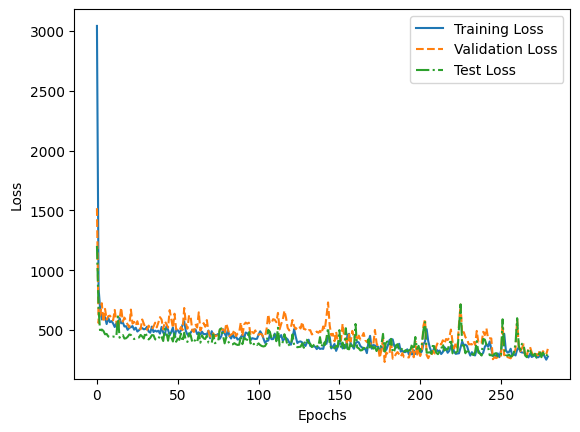

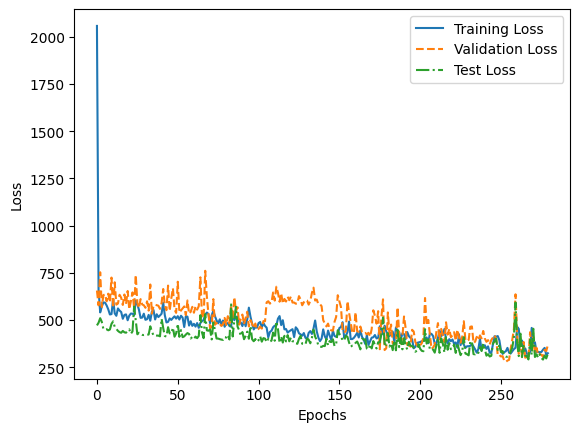

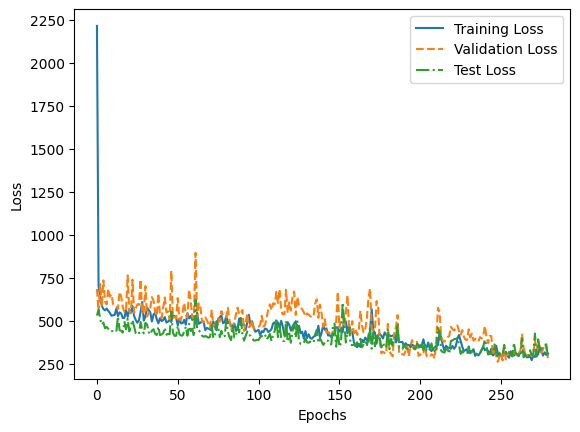

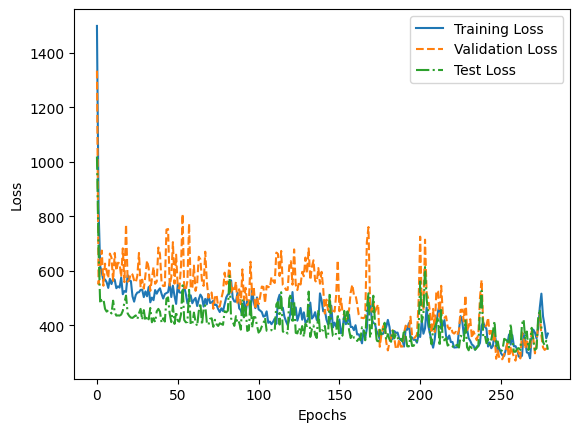

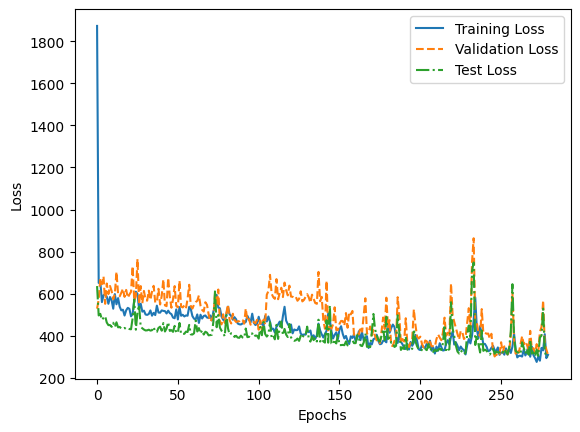

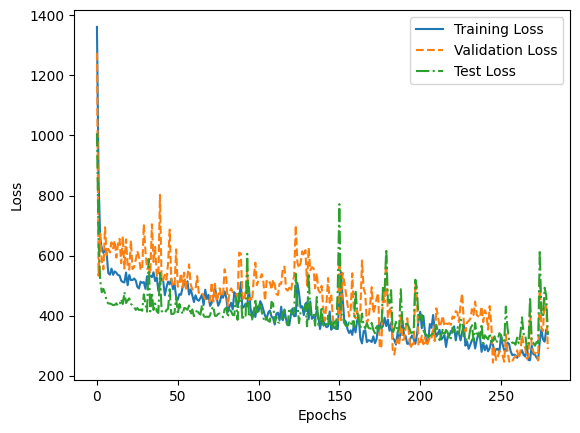

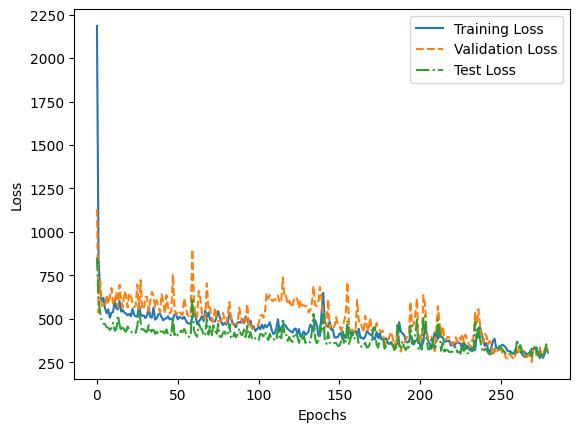

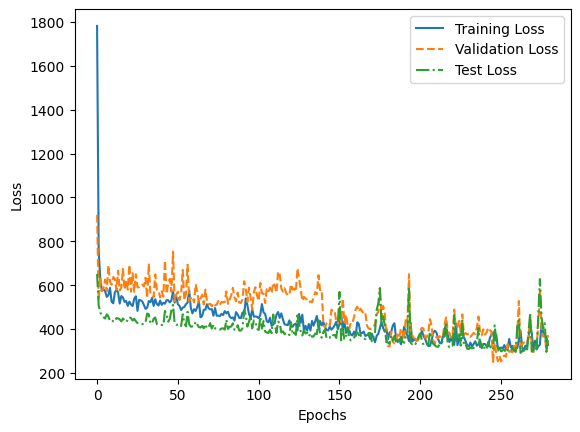

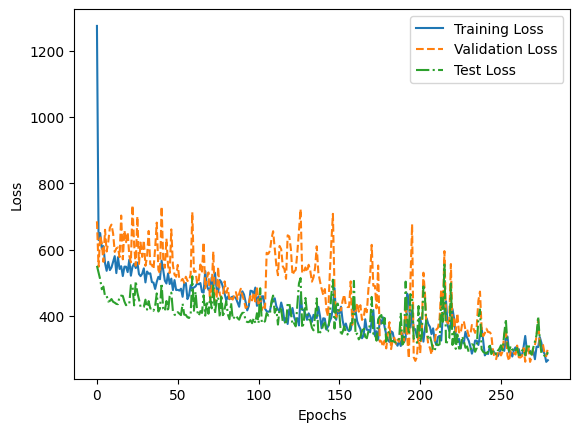

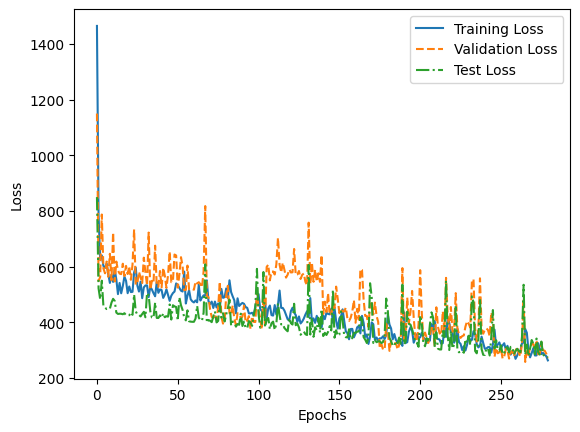

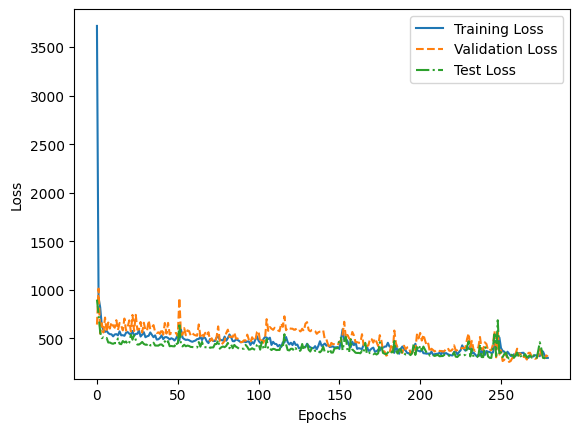

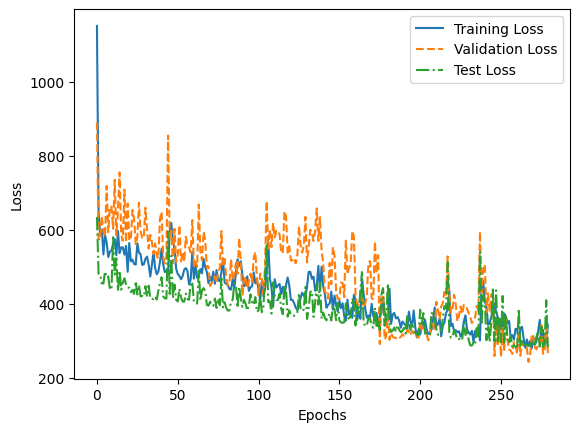

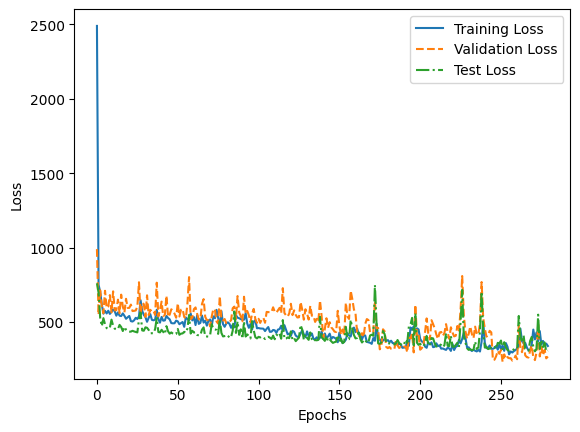

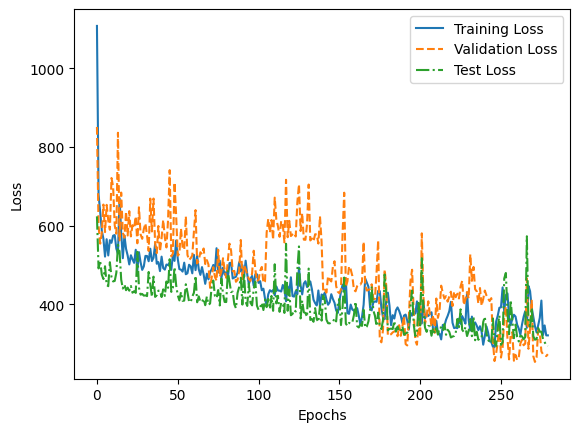

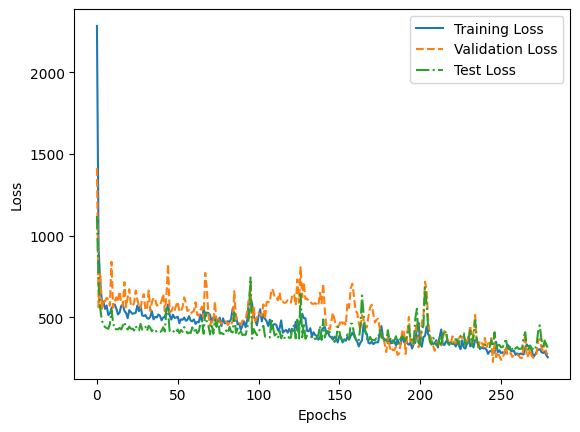

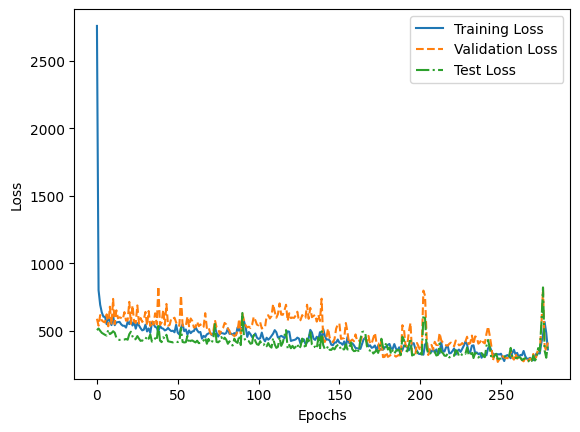

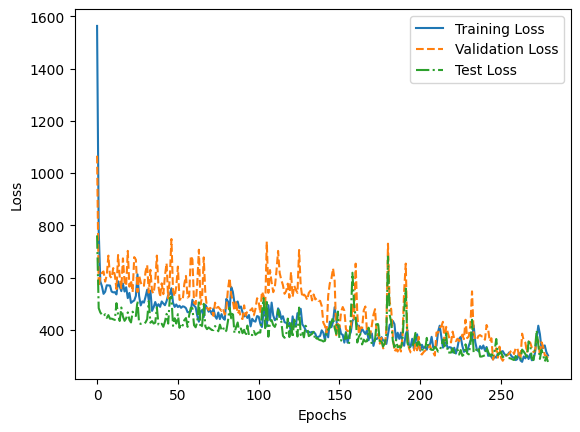

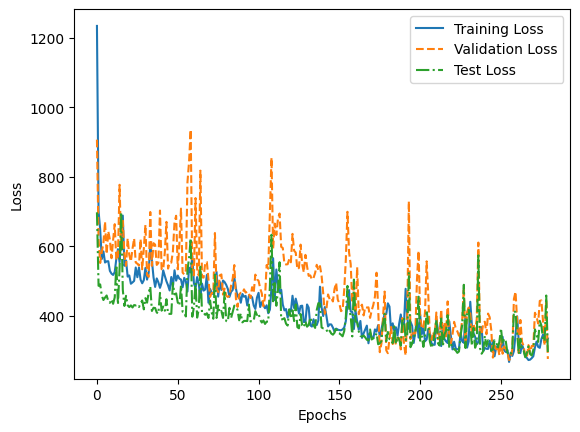

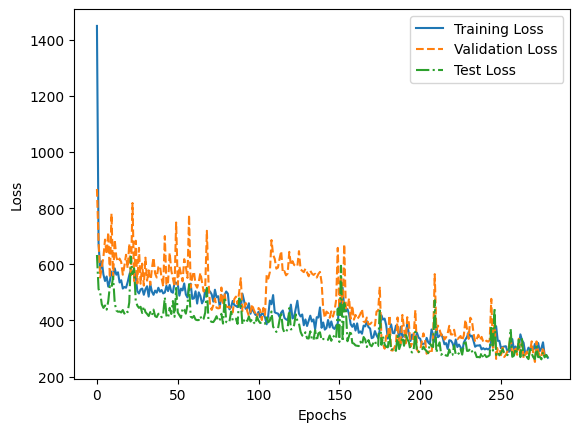

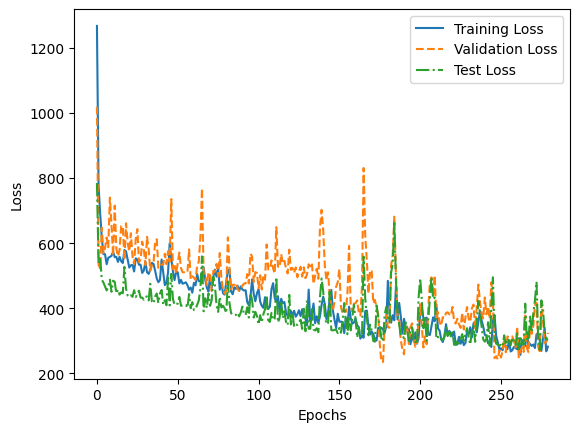

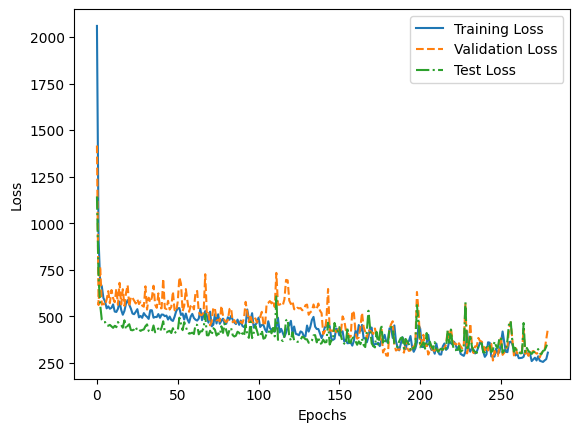

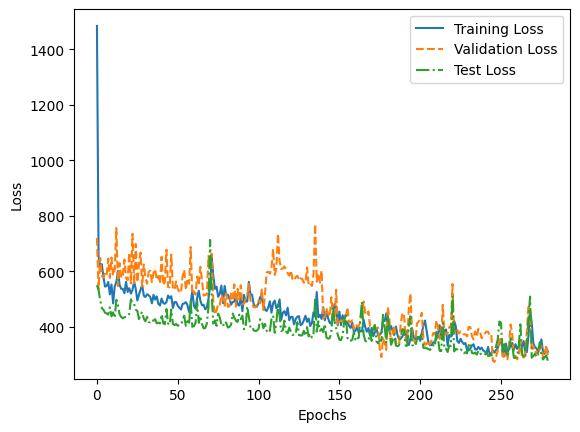

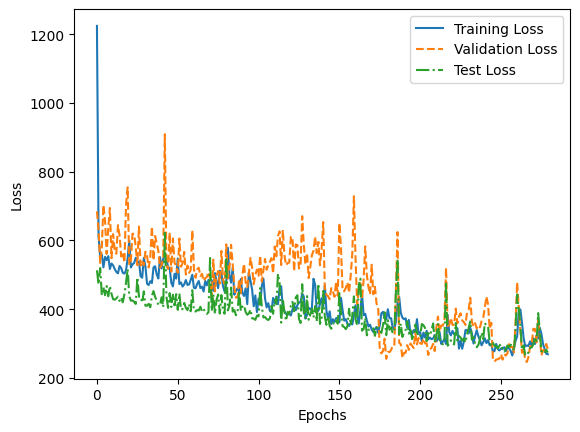

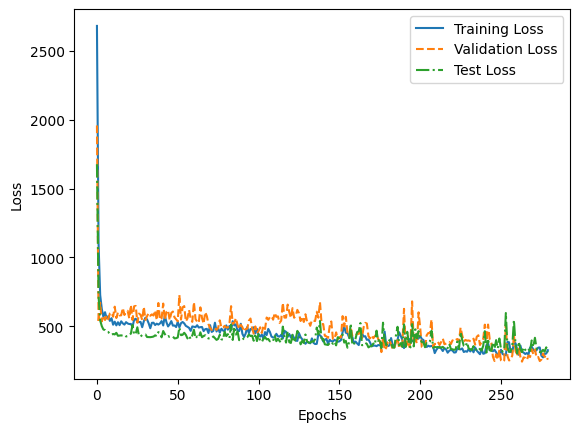

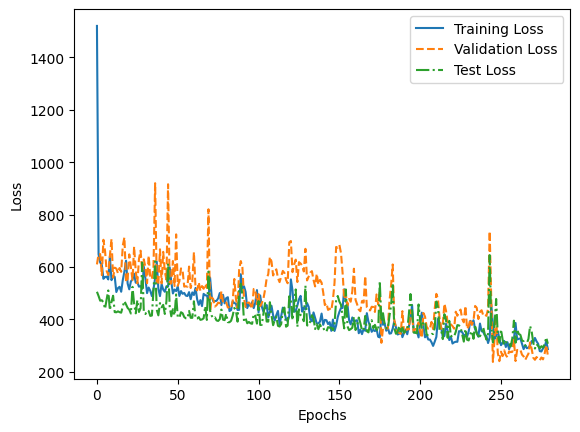

In [ ]:
# Create neural networks(s)

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

performance = []
r2_scores = []
decays = []

predicteds = []

for i in range(25): #only include this loop for optimizing hyperparameters
  num_folds = 8
  kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

  model = nn.Sequential(
      nn.Linear(29, 60),
      nn.ReLU(),
      nn.Linear(60, 30),
      nn.ReLU(),
      nn.Linear(30, 1)
    )

  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=0.0091, weight_decay=0.0079)

  test_dataset = TensorDataset(X_val, y_val)
  test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

  train_losses = []
  val_losses = []
  test_losses = []

  for fold, (train_index, val_index) in enumerate(kf.split(X_train)):

    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    fold_train_dataset = TensorDataset(X_fold_train, y_fold_train)
    fold_train_loader = DataLoader(fold_train_dataset, batch_size=100, shuffle=True)

    fold_val_dataset = TensorDataset(X_fold_val, y_fold_val)
    fold_val_loader = DataLoader(fold_val_dataset, batch_size=64, shuffle=False)

    epochs = 35

    for epoch in range(epochs):
        train_loss = train_model(model, fold_train_loader, criterion, optimizer)
        val_loss = validate_model(model, fold_val_loader, criterion)
        test_loss = test_model(model, test_loader, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        test_losses.append(test_loss)


  plt.plot(train_losses, label='Training Loss')
  plt.plot(val_losses, label='Validation Loss', linestyle='--')
  plt.plot(test_losses, label='Test Loss', linestyle='-.')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  outputs = model(X_test)
  predicted = outputs.detach().numpy()
  model.eval()
  X_test = X_test.view(X_test.size(0), -1)
  outputs = model(X_test)
  predicted = outputs.detach().numpy()
  predicteds.append(predicted)
  mae = mean_absolute_error(y_test, predicted)
  r2score = r2_score(y_test, predicted)
  r2_scores.append(r2score)
  performance.append((mae, r2score, mape(y_test, predicted)))

In [ ]:
print(r2_scores.index(max(r2_scores)))
print(performance)

18
[(15.135885, -0.21463150313551238, 0.27564237), (15.010877, -0.1809327920596835, 0.27128813), (14.470472, -0.09953771713382231, 0.2798702), (14.94401, -0.16601818302648153, 0.29460627), (14.293802, -0.08420008736027951, 0.28660265), (15.622638, -0.3311048156371095, 0.32390952), (14.3756485, -0.075390997224972, 0.26791292), (15.936376, -0.31055340036036316, 0.27276093), (14.427649, -0.07672025788054881, 0.27270016), (13.774546, -0.0030658328064097073, 0.27261713), (14.206476, -0.07158391731430447, 0.2684628), (13.943017, -0.03684451806720235, 0.27243665), (14.604544, -0.12240742181335884, 0.27672234), (14.329462, -0.06341786072348099, 0.28066146), (14.639239, -0.15846397563973658, 0.2719688), (16.287449, -0.37681134957284046, 0.2746101), (13.85175, -0.015397184133385977, 0.27851367), (14.937535, -0.18566289414956305, 0.31083766), (13.540133, 0.011049258338047818, 0.2694196), (14.809991, -0.14030975521754852, 0.27216306), (15.743652, -0.28826303207050485, 0.27578706), (13.834038, -0.0

In [ ]:
ys = []
for each in y_test:
  ys.append(each[0])

In [ ]:
for each in performance:
  print(each[1])

# R2 score extremely volatile; data not correlated well by the model

-0.21463150313551238
-0.1809327920596835
-0.09953771713382231
-0.16601818302648153
-0.08420008736027951
-0.3311048156371095
-0.075390997224972
-0.31055340036036316
-0.07672025788054881
-0.0030658328064097073
-0.07158391731430447
-0.03684451806720235
-0.12240742181335884
-0.06341786072348099
-0.15846397563973658
-0.37681134957284046
-0.015397184133385977
-0.18566289414956305
0.011049258338047818
-0.14030975521754852
-0.28826303207050485
-0.022525443384709742
-0.109464988819574
-0.25828207842283923
-0.23090773994796066


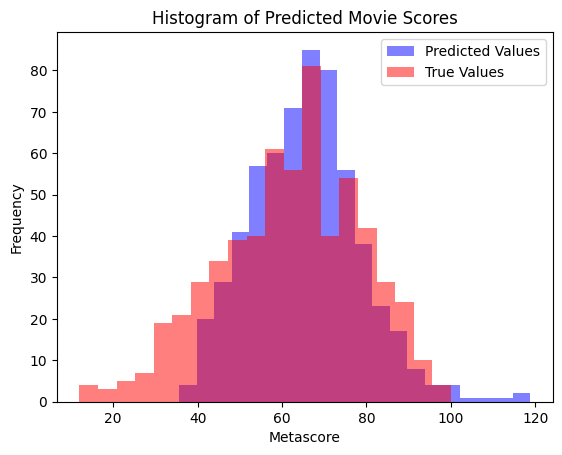

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for two arrays

# Plot histograms
plt.hist(predicted, bins=20, alpha=0.5, label='Predicted Values', color='blue')
plt.hist(ys, bins=20, alpha=0.5, label='True Values', color='red')

# Add labels and title
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Movie Scores')

# Add legend
plt.legend()

plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


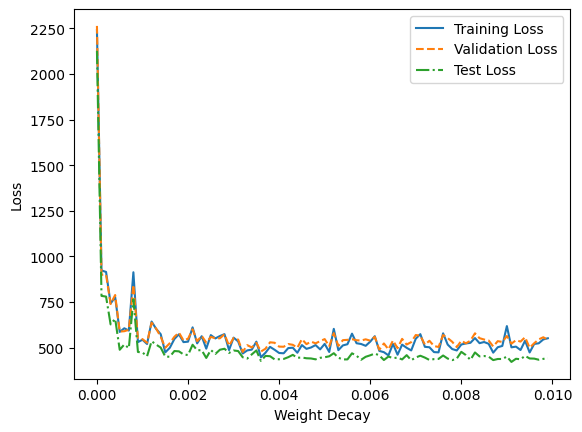

In [ ]:
x = list(range(0, 100, 1))
print(x)
for i in range(100):
  x[i] = 0.0001 * i

plt.plot(x, train_loss_plot, label='Training Loss')
plt.plot(x, val_loss_plot, label='Validation Loss', linestyle='--')
plt.plot(x, test_loss_plot, label='Test Loss', linestyle='-.')
plt.xlabel('Weight Decay')
plt.ylabel('Loss')
plt.title('Neural Network Peroformance by Learnung rate')
plt.legend()
plt.show()

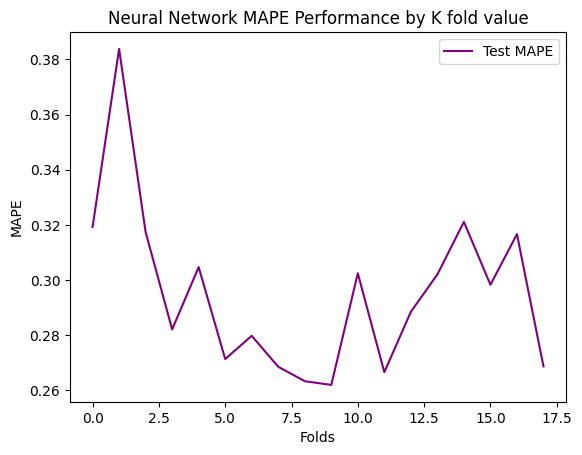

In [ ]:
maes = []
mapes = []
x = []

for i in range(len(performance)):
  maes.append(performance[i][0])
  mapes.append(performance[i][2])
  x.append(i)


#plt.plot(x, maes, label='Test MAE', color='black')
plt.plot(x, mapes, label='Test MAPE', color='purple')
plt.xlabel('Folds')
plt.ylabel('MAPE')
plt.title('Neural Network MAPE Performance by K fold value')
plt.legend()
plt.show()